In [41]:
import pandas as pd
import numpy as np
import os 
import re
import matplotlib.pyplot as plt
import scipy
# from scipy.stats.stats import pearsonr 
import os
from pathlib import Path
import math
from statsmodels.stats.multitest import multipletests
import statsmodels
from scipy.stats import ttest_rel, ttest_ind
from scipy import stats
from statsmodels.stats.multitest import fdrcorrection as fdr

In [2]:
normal =pd.read_csv('data/lusc-rsem-fpkm-tcga_paired.txt', sep="\t", header=0)
print(len(normal))
print(normal.columns)
print(normal.head(3))

19648
Index(['Hugo_Symbol', 'Entrez_Gene_Id', 'TCGA-43-7657', 'TCGA-58-8386',
       'TCGA-22-5478', 'TCGA-22-5472', 'TCGA-43-5670', 'TCGA-60-2709',
       'TCGA-22-5489', 'TCGA-77-8007', 'TCGA-22-5471', 'TCGA-22-4609',
       'TCGA-22-5482', 'TCGA-56-8082', 'TCGA-22-5483', 'TCGA-56-8623',
       'TCGA-33-4587', 'TCGA-56-7579', 'TCGA-43-3394', 'TCGA-34-8454',
       'TCGA-77-7338', 'TCGA-43-6143', 'TCGA-43-6773', 'TCGA-51-4080',
       'TCGA-34-7107', 'TCGA-39-5040', 'TCGA-43-6771', 'TCGA-92-7340',
       'TCGA-77-7138', 'TCGA-77-7142', 'TCGA-56-7823', 'TCGA-22-5491',
       'TCGA-22-5481', 'TCGA-90-7767', 'TCGA-77-8008', 'TCGA-56-7730',
       'TCGA-33-6737', 'TCGA-56-7582', 'TCGA-56-7731', 'TCGA-77-7337',
       'TCGA-43-7658', 'TCGA-56-8201', 'TCGA-85-7710', 'TCGA-56-7580',
       'TCGA-43-6647', 'TCGA-90-6837', 'TCGA-56-8083', 'TCGA-51-4079',
       'TCGA-56-7222', 'TCGA-22-4593', 'TCGA-51-4081', 'TCGA-56-8309'],
      dtype='object')
  Hugo_Symbol  Entrez_Gene_Id  TCGA-43-7657  TC

In [3]:
cancer = pd.read_csv('data/lusc-rsem-fpkm-tcga-t_paired.txt', sep="\t", header=0)
print(len(cancer))
print(cancer.columns)
print(cancer.head(3))

19648
Index(['Hugo_Symbol', 'Entrez_Gene_Id', 'TCGA-43-7657', 'TCGA-58-8386',
       'TCGA-22-5478', 'TCGA-22-5472', 'TCGA-43-5670', 'TCGA-60-2709',
       'TCGA-22-5489', 'TCGA-77-8007', 'TCGA-22-5471', 'TCGA-22-4609',
       'TCGA-22-5482', 'TCGA-56-8082', 'TCGA-22-5483', 'TCGA-56-8623',
       'TCGA-33-4587', 'TCGA-56-7579', 'TCGA-43-3394', 'TCGA-34-8454',
       'TCGA-77-7338', 'TCGA-43-6143', 'TCGA-43-6773', 'TCGA-51-4080',
       'TCGA-34-7107', 'TCGA-39-5040', 'TCGA-43-6771', 'TCGA-92-7340',
       'TCGA-77-7138', 'TCGA-77-7142', 'TCGA-56-7823', 'TCGA-22-5491',
       'TCGA-22-5481', 'TCGA-90-7767', 'TCGA-77-8008', 'TCGA-56-7730',
       'TCGA-33-6737', 'TCGA-56-7582', 'TCGA-56-7731', 'TCGA-77-7337',
       'TCGA-43-7658', 'TCGA-56-8201', 'TCGA-85-7710', 'TCGA-56-7580',
       'TCGA-43-6647', 'TCGA-90-6837', 'TCGA-56-8083', 'TCGA-51-4079',
       'TCGA-56-7222', 'TCGA-22-4593', 'TCGA-51-4081', 'TCGA-56-8309'],
      dtype='object')
  Hugo_Symbol  Entrez_Gene_Id  TCGA-43-7657  TC

In [4]:
def check(normal, cancer):
    if not (normal.columns == cancer.columns).all():
        print('Different Columns')
    if not (len(normal) == len(cancer)):
        print('Different length')
    else: 
        print('checked')
# print(normal.columns == cancer.columns)
# print(len(normal) == len(cancer))
check(normal, cancer)

checked


In [9]:
normal_x = normal[((normal == 0).astype(int).sum(axis=1))<25]
cancer_x = cancer[((cancer == 0).astype(int).sum(axis=1))<25]
print(len(normal_x), len(cancer_x))

17626 17717


In [10]:
names = np.intersect1d(normal_x.Hugo_Symbol, cancer_x.Hugo_Symbol)

normal_x = normal_x[normal_x['Hugo_Symbol'].isin(names)]
cancer_x = cancer_x[cancer_x['Hugo_Symbol'].isin(names)]
normal_x.dropna()
cancer_x.dropna()
print(len(normal_x), len(cancer_x))

17275 17275


In [13]:
check(normal_x, cancer_x)

checked


In [14]:
np.array(normal_x.iloc[0][2:])

array([62.12, 130.6, 33.06, 35.5, 73.03, 60.39, 92.05, 66.65, 54.33,
       15.56, 55.49, 30.34, 14.45, 100.83, 131.51, 59.55, 87.03, 71.5,
       23.08, 48.87, 72.52, 115.97, 45.21, 74.58, 8.92, 27.44, 40.64,
       35.76, 59.13, 20.86, 37.05, 48.18, 51.71, 49.56, 72.01, 21.94,
       27.44, 35.0, 76.17, 28.86, 90.77, 59.55, 40.07, 22.92, 29.91,
       82.29, 4.7, 37.32, 43.63, 77.25], dtype=object)

# Normality test 

## paired 

In [33]:
print(cancer_x.iloc[0,:])
normal_x.iloc[0,:]

Hugo_Symbol       HIST3H2A
Entrez_Gene_Id       92815
TCGA-43-7657        336.79
TCGA-58-8386        500.46
TCGA-22-5478        703.28
TCGA-22-5472        287.01
TCGA-43-5670        486.75
TCGA-60-2709         70.51
TCGA-22-5489        145.02
TCGA-77-8007         14.03
TCGA-22-5471        397.93
TCGA-22-4609        318.57
TCGA-22-5482        463.65
TCGA-56-8082          6.78
TCGA-22-5483        242.88
TCGA-56-8623        135.24
TCGA-33-4587        363.56
TCGA-56-7579        231.32
TCGA-43-3394         403.5
TCGA-34-8454        136.19
TCGA-77-7338         130.6
TCGA-43-6143        285.03
TCGA-43-6773        156.59
TCGA-51-4080        954.43
TCGA-34-7107        454.09
TCGA-39-5040        110.43
TCGA-43-6771         16.51
TCGA-92-7340        447.82
TCGA-77-7138        103.69
TCGA-77-7142        187.71
TCGA-56-7823        127.89
TCGA-22-5491        718.08
TCGA-22-5481        836.53
TCGA-90-7767         98.73
TCGA-77-8008         80.57
TCGA-56-7730        260.38
TCGA-33-6737        197.09
T

Hugo_Symbol       HIST3H2A
Entrez_Gene_Id       92815
TCGA-43-7657         62.12
TCGA-58-8386         130.6
TCGA-22-5478         33.06
TCGA-22-5472          35.5
TCGA-43-5670         73.03
TCGA-60-2709         60.39
TCGA-22-5489         92.05
TCGA-77-8007         66.65
TCGA-22-5471         54.33
TCGA-22-4609         15.56
TCGA-22-5482         55.49
TCGA-56-8082         30.34
TCGA-22-5483         14.45
TCGA-56-8623        100.83
TCGA-33-4587        131.51
TCGA-56-7579         59.55
TCGA-43-3394         87.03
TCGA-34-8454          71.5
TCGA-77-7338         23.08
TCGA-43-6143         48.87
TCGA-43-6773         72.52
TCGA-51-4080        115.97
TCGA-34-7107         45.21
TCGA-39-5040         74.58
TCGA-43-6771          8.92
TCGA-92-7340         27.44
TCGA-77-7138         40.64
TCGA-77-7142         35.76
TCGA-56-7823         59.13
TCGA-22-5491         20.86
TCGA-22-5481         37.05
TCGA-90-7767         48.18
TCGA-77-8008         51.71
TCGA-56-7730         49.56
TCGA-33-6737         72.01
T

In [19]:
diff = normal_x.iloc[:,2:] - cancer_x.iloc[:,2:]
print(diff.shape)
diff.head(5)

(17275, 50)


,TCGA-43-7657,TCGA-58-8386,TCGA-22-5478,TCGA-22-5472,TCGA-43-5670,TCGA-60-2709,TCGA-22-5489,TCGA-77-8007,TCGA-22-5471,TCGA-22-4609,...,TCGA-85-7710,TCGA-56-7580,TCGA-43-6647,TCGA-90-6837,TCGA-56-8083,TCGA-51-4079,TCGA-56-7222,TCGA-22-4593,TCGA-51-4081,TCGA-56-8309
0,-274.67,-369.86,-670.22,-251.51,-413.72,-10.12,-52.97,52.62,-343.60,-303.01,...,87.71,-361.13,-69.59,-83.71,-1203.84,-90.36,-298.74,-190.81,-207.85,53.66
1,79.96,70.27,17.01,-43.71,-7.08,-83.55,25.62,46.19,-83.50,-71.73,...,49.87,-15.98,-48.25,-271.68,-31.08,73.42,52.37,8.47,-92.09,202.71
2,60.95,583.09,140.52,-15.65,1279.59,-12.80,1379.42,1109.77,16.54,-82.74,...,124.85,2196.90,105.37,1690.04,-2499.11,-86.11,146.60,256.90,263.15,531.88
3,9.22,9.78,-4.92,60.96,5.51,17.36,7.99,8.76,26.66,30.51,...,33.13,63.39,51.38,56.23,33.58,31.40,21.28,28.58,0.99,43.75
4,48.73,139.69,41.02,51.77,87.37,78.87,29.36,151.30,-216.69,68.07,...,85.91,90.58,32.45,56.09,-77.44,95.02,212.40,-3.71,-34.05,1.08


In [20]:
non=0
normm = 0
for i in range (len(diff)):
        sample = np.array(diff.iloc[i])
        stat,pval = stats.shapiro(sample)
        if pval > 0.05 :
            diff.at[i,'paired'] = 'ND'
            normm+=1
        else: 
            diff.at[i,'paired'] = 'NOT'
            non+=1
norm = len(diff[diff['paired'] == 'ND'])
Not = len(diff[diff['paired'] == 'NOT'])
print(normm, non)
print(f"no of normally distributed {norm} and no of not normally distributed {Not}")

17274 1
no of normally distributed 17274 and no of not normally distributed 1


<AxesSubplot:ylabel='Frequency'>

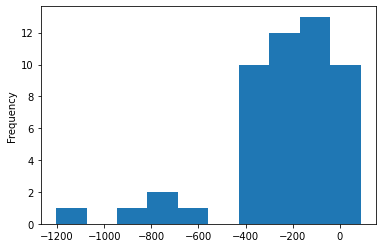

In [26]:
diff[diff['paired']=='NOT'].iloc[0,:-1].plot.hist()

<AxesSubplot:ylabel='Frequency'>

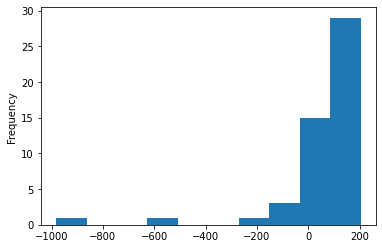

In [31]:
diff[diff['paired']=='ND'].iloc[9,:-1].plot.hist()

In [32]:
df=normal_x.drop("Hugo_Symbol",axis=1).drop("Entrez_Gene_Id",axis=1)-cancer_x.drop("Hugo_Symbol",axis=1).drop("Entrez_Gene_Id",axis=1)
for i in range (len(df)):
        sample = np.array(df.iloc[i][2:-1])
        stat,pval = stats.shapiro(sample)
        if pval > 0.05 :
            df.at[i,'paired'] = 'ND'
        else: 
            df.at[i,'paired'] = 'NOT'
norm = len(df[df['paired'] == 'ND'])
Not = len(df[df['paired'] == 'NOT'])
print(f"no of normally distributed {norm} and no of not normally distributed {Not}")

no of normally distributed 5861 and no of not normally distributed 11414


### Independent 

In [35]:
dfs = [normal_x, cancer_x]
for df in dfs:
    df['normality'] = ''
    for i in range (len(df)):
        sample = np.array(df.iloc[i][2:-1])
        stat,pval = stats.shapiro(sample)
        if pval > 0.05 :
            df.at[i,'normality'] = 'ND'
        else: 
            df.at[i,'normality'] = 'NOT'
    df.head(3)

In [37]:
normal_x.iloc[5][2:-1].shape

(50,)

In [38]:
counter = 0
x = ['normal', 'cancer']
for df in dfs:
    norm = len(df[df['normality'] == 'ND'])
    not_norm = len(df[df['normality'] == 'NOT'])
    print('dataframe {} has {} normally distrbuted genes and {} not normally distributed'.format( x[counter],norm, not_norm))
    counter +=1

dataframe normal has 6994 normally distrbuted genes and 10281 not normally distributed
dataframe cancer has 2028 normally distrbuted genes and 15247 not normally distributed


In [39]:
data = [normal_x.dropna().copy(), cancer_x.dropna().copy()]
for df in data:
    df.drop('Hugo_Symbol',axis=1, inplace=True)
    df.drop('Entrez_Gene_Id',axis=1, inplace=True)
    df.drop('normality',axis=1, inplace=True)
    print(df.shape)
    print(df.columns)
    print('-'*60)

(17275, 50)
Index(['TCGA-43-7657', 'TCGA-58-8386', 'TCGA-22-5478', 'TCGA-22-5472',
       'TCGA-43-5670', 'TCGA-60-2709', 'TCGA-22-5489', 'TCGA-77-8007',
       'TCGA-22-5471', 'TCGA-22-4609', 'TCGA-22-5482', 'TCGA-56-8082',
       'TCGA-22-5483', 'TCGA-56-8623', 'TCGA-33-4587', 'TCGA-56-7579',
       'TCGA-43-3394', 'TCGA-34-8454', 'TCGA-77-7338', 'TCGA-43-6143',
       'TCGA-43-6773', 'TCGA-51-4080', 'TCGA-34-7107', 'TCGA-39-5040',
       'TCGA-43-6771', 'TCGA-92-7340', 'TCGA-77-7138', 'TCGA-77-7142',
       'TCGA-56-7823', 'TCGA-22-5491', 'TCGA-22-5481', 'TCGA-90-7767',
       'TCGA-77-8008', 'TCGA-56-7730', 'TCGA-33-6737', 'TCGA-56-7582',
       'TCGA-56-7731', 'TCGA-77-7337', 'TCGA-43-7658', 'TCGA-56-8201',
       'TCGA-85-7710', 'TCGA-56-7580', 'TCGA-43-6647', 'TCGA-90-6837',
       'TCGA-56-8083', 'TCGA-51-4079', 'TCGA-56-7222', 'TCGA-22-4593',
       'TCGA-51-4081', 'TCGA-56-8309'],
      dtype='object')
------------------------------------------------------------
(17275, 50)
I

In [40]:
data[0]

,TCGA-43-7657,TCGA-58-8386,TCGA-22-5478,TCGA-22-5472,TCGA-43-5670,TCGA-60-2709,TCGA-22-5489,TCGA-77-8007,TCGA-22-5471,TCGA-22-4609,...,TCGA-85-7710,TCGA-56-7580,TCGA-43-6647,TCGA-90-6837,TCGA-56-8083,TCGA-51-4079,TCGA-56-7222,TCGA-22-4593,TCGA-51-4081,TCGA-56-8309
0,62.12,130.60,33.06,35.50,73.03,60.39,92.05,66.65,54.33,15.56,...,90.77,59.55,40.07,22.92,29.91,82.29,4.70,37.32,43.63,77.25
1,185.11,283.05,119.26,169.07,165.57,161.02,131.51,198.47,175.07,147.06,...,185.11,119.26,102.97,123.50,264.03,194.36,166.73,105.15,185.11,356.05
2,909.17,819.30,412.00,743.43,1340.84,607.87,1709.26,1709.26,603.67,555.41,...,813.63,2400.97,543.96,2193.99,540.19,521.76,253.23,764.36,518.15,878.17
3,41.81,18.29,40.93,67.12,54.72,29.27,20.26,23.76,28.04,39.22,...,34.51,70.01,57.49,57.89,67.12,34.51,22.10,31.90,28.24,49.91
4,133.36,214.27,108.14,109.66,190.34,211.31,96.01,208.38,120.10,239.52,...,251.48,209.84,120.10,109.66,155.50,162.14,277.20,86.43,164.42,155.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19641,215.77,148.09,83.45,232.94,167.90,80.01,161.02,104.42,81.14,113.56,...,145.02,202.66,111.99,371.22,154.42,289.02,32.59,191.67,204.07,88.26
19642,6792.79,5441.30,5831.91,5329.30,5711.87,6164.49,8134.41,6516.03,8598.28,5633.22,...,3955.48,4869.99,6935.54,4836.35,7230.10,6250.56,6840.04,5292.48,3928.15,7130.55
19643,423.61,529.06,660.68,620.67,518.15,848.22,366.09,1073.91,363.56,366.09,...,559.28,579.04,420.68,366.09,334.46,258.57,329.84,1030.12,665.29,633.73
19646,0.00,0.00,0.99,3.59,2.23,3.35,0.00,7.34,1.41,0.00,...,6.94,1.00,0.00,4.58,0.96,3.06,1.83,1.77,3.63,2.56


# As the data is not normally distributed ,Only 1124 are normally distributed,

## on the paired will used wilcoxon

In [53]:
stat, p = stats.wilcoxon(data[0], data[1], axis=1)
wilcoxon = pd.DataFrame(list(zip(normal_x.dropna().Hugo_Symbol, normal_x.dropna().Entrez_Gene_Id, normal_x.dropna().normality, p, stat)))
wilcoxon.columns =['Hugo_Symbol', 'Entrez_Gene_Id', 'normality', 'p', 'stat']
wilcoxon['expression'] = np.where(wilcoxon['p']>0.05, 'not', 'expressed')
print(len(wilcoxon))
wilcoxon.head(10)

17275


,Hugo_Symbol,Entrez_Gene_Id,normality,p,stat,expression
0,HIST3H2A,92815.0,NOT,1.008929e-08,44.0,expressed
1,LIN7B,64130.0,NOT,2.384960e-01,494.0,not
2,LXN,56925.0,NOT,1.725267e-06,142.0,expressed
3,CNKSR2,22866.0,ND,1.265880e-08,48.0,expressed
4,SCML1,6322.0,NOT,1.601853e-02,388.0,expressed
5,AC024592.12,0.0,NOT,6.735523e-02,448.0,not
6,GSDMD,79792.0,NOT,1.493082e-06,139.0,expressed
7,AKR1C1,1645.0,NOT,1.196552e-04,239.0,expressed
8,C3orf62,375341.0,ND,4.583914e-08,55.0,expressed
9,CRISPLD2,83716.0,NOT,2.089327e-06,146.0,expressed


In [54]:
fdr(p)[1].shape

(17275,)

In [55]:
wilcoxon['fdr'] = fdr(p)[1]
wilcoxon['fdr_hypothesis'] = fdr(p)[0]

### on the whole independant dataset we'll use mann

In [56]:
stat, p =  stats.mannwhitneyu(data[0], data[1], axis=1)
mannwhitneyu = pd.DataFrame(list(zip(normal_x.dropna().Hugo_Symbol, normal_x.dropna().Entrez_Gene_Id, normal_x.dropna().normality, p, stat)))
mannwhitneyu.columns =['Hugo_Symbol', 'Entrez_Gene_Id', 'normality', 'p', 'stat']
mannwhitneyu['expression'] = np.where(mannwhitneyu['p']>0.05, 'not', 'expressed')
print(len(mannwhitneyu))
mannwhitneyu.head(10)

17275


,Hugo_Symbol,Entrez_Gene_Id,normality,p,stat,expression
0,HIST3H2A,92815.0,NOT,3.992418e-11,291.5,expressed
1,LIN7B,64130.0,NOT,3.466495e-01,1113.0,not
2,LXN,56925.0,NOT,1.767109e-07,2008.0,expressed
3,CNKSR2,22866.0,ND,1.711104e-12,2274.0,expressed
4,SCML1,6322.0,NOT,4.456068e-03,1663.0,expressed
5,AC024592.12,0.0,NOT,1.089568e-01,1017.0,not
6,GSDMD,79792.0,NOT,3.746315e-07,1987.5,expressed
7,AKR1C1,1645.0,NOT,7.397799e-03,861.0,expressed
8,C3orf62,375341.0,ND,3.912050e-09,2104.5,expressed
9,CRISPLD2,83716.0,NOT,1.888082e-05,1871.0,expressed


In [57]:
mannwhitneyu['fdr'] = fdr(p)[1]
mannwhitneyu['fdr_hypothesis'] = fdr(p)[0]

In [59]:
mannwhitneyu.to_excel("indep_fdr_2sided.xlsx")
wilcoxon.to_excel("paired_fdr_2sided.xlsx")